In [2]:
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets...", end="")

    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)


Read Video from Source:

In [4]:
source = 'race_car.mp4'
cap = cv2.VideoCapture(source)

if not cap.isOpened():
    print("Erro opening video stream/file")

Read and display one frame:

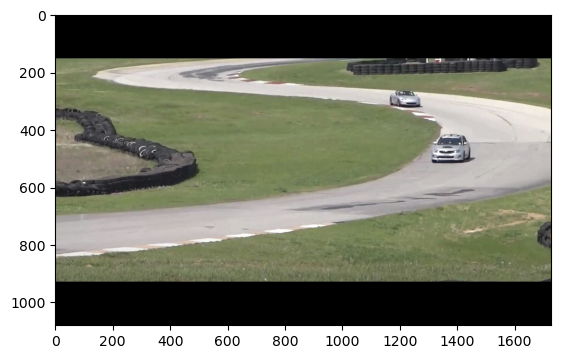

In [5]:
ret, frame = cap.read()
plt.imshow(frame[...,::-1])
plt.show()

Display video file:

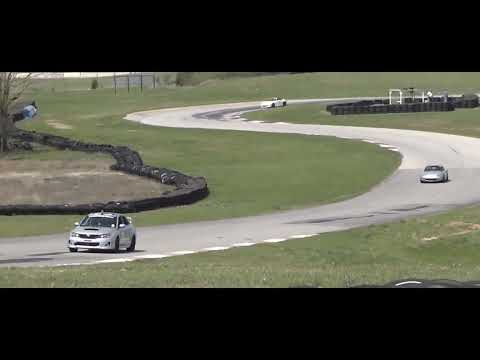

In [6]:
video = YouTubeVideo("RwxVEjv78LQ", width = 700, height =438)
display(video)

Write Video using OpenCV:

VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize)

filename: Name of the output video file
fourcc: 4 character code of codec used to compress the frames. For example VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codecc. 
fps: framerate of the created video stream.
frameSize: size of the video frames.

In [8]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))
out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Read frames and write to file:

In [9]:
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        out_avi.write(frame)
        out_mp4.write(frame)
    else:
        break
cap.release()
out_avi.release()
out_mp4.release()

HTML 5 can properly render videos with H264 ecoding but OpenCV doesn't have that encoding yet.

In [10]:
!apt-get -qq install ffmeg

zsh:1: command not found: apt-get


In [11]:
!ffmpeg -y -i "/content/race_car_out.mp4" -c:v libx264 "race_car_out_x264.mp4"  -hide_banner -loglevel error

zsh:1: command not found: ffmpeg


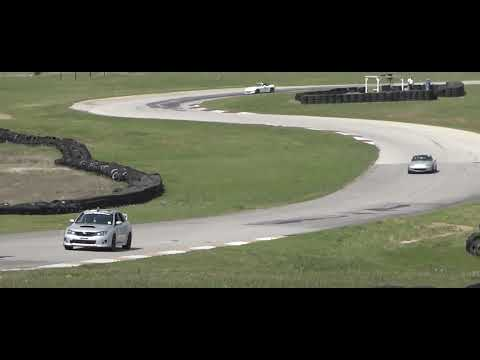

In [13]:
#mp4 = open("/content/race_car_out_x264.mp4", "rb").read()
#data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

#HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")
video = YouTubeVideo("2Gju7YLfkP0", width=700, height=438)
display(video)

In conclusion:
VideoWriter it used to write frames to a video file.